In [2]:
!pip install seaborn



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\qfu88\Desktop\KwF\Bioacoustics-analysis\Datas\combined.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634921 entries, 0 to 634920
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   clip_name             634921 non-null  object 
 1   Recorder              634921 non-null  object 
 2   Timestamp             634921 non-null  object 
 3   Duration (sec)        634921 non-null  float64
 4   Sample Rate (Hz)      634921 non-null  int64  
 5   Channels              634921 non-null  int64  
 6   Bit Depth             634921 non-null  int64  
 7   File Size (KB)        634921 non-null  float64
 8   Battery Voltage       634921 non-null  object 
 9   Gain                  634921 non-null  object 
 10  Spectral Centroid     634921 non-null  float64
 11  Zero Crossing Rate    634921 non-null  float64
 12  Human Activity        634921 non-null  object 
 13  Human Activity Score  634921 non-null  float64
 14  start                 634921 non-null  float64
 15  

## Data Cleaning

In [6]:
## drop the cols that only have one unique value

cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

print(cols_to_drop)

['Sample Rate (Hz)', 'Channels', 'Bit Depth', 'Battery Voltage', 'Gain', 'start']


In [7]:
## I don't want to only drop "start", so I keep it for now

df = df.drop(columns= ['Sample Rate (Hz)','Channels','Bit Depth', 'Battery Voltage', 'Gain'])

## Feature Based Exploration

I plan to conduct several analyses to answer specific questions. 
For each question, I will first explore the features (columns) relevant to that question. 
For example, if a question involves environmental conditions and bird activity, I will begin by exploring those related features. 
After the initial exploration, I will dive deeper to perform targeted analysis and draw conclusions based on the findings.


### EXploring Environmental Conditions VS Bird Species Confidence

Questions I can answer like:

1, Which weather conditions lead to the highest confidence in species detection?

2, Do certain bird species get detected more confidently during specific weather conditions?

3, Is there a pattern between windspeed or temperature and detection confidence for active species?

**key Features involved: confidence, species, Temperature, Windspeed, Weather_Desc, Human Activity and score. **

#### Feature One: Confidence

In [8]:
## first, filter out the clips that have no detection confidence 

df_con = df[df['confidence'] != '[]']

In [9]:
##check what's the value look like in confidence 
df_con[["confidence"]].tail(10)

,confidence
634717,[0.9083453]
634718,[0.9631853]
634727,[0.45411408]
634735,[0.3463811]
634741,[0.27142888]
634750,[0.25755468]
634787,[0.27244568]
634797,[0.4235891]
634798,[0.4276261]
634855,[0.25457552]


In [10]:
df_con[["confidence"]].shape

(109745, 1)

In [11]:
ratio = len(df_con) / len(df)
print(f"Ratio of clips with confidence scores: {ratio:.2%}")


Ratio of clips with confidence scores: 17.28%


In [12]:
# randomly check raw type and content of a few entries
for i in range(5):
    print(type(df_con['confidence'].iloc[i]), df_con['confidence'].iloc[i])


<class 'str'> [0.34153312]
<class 'str'> [0.26743847]
<class 'str'> [0.2847662]
<class 'str'> [0.4635468]
<class 'str'> [0.5601822]


In [13]:
##convert string into float

df_con['confidence'] = df_con['confidence'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)

C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\1250872818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['confidence'] = df_con['confidence'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)


In [14]:
##confirm
print(df_con['confidence'].head())
print(df_con['confidence'].dtype)


105    0.341533
114    0.267438
128    0.284766
208    0.463547
347    0.560182
Name: confidence, dtype: float64
float64


In [15]:
##check the distribution
df_con['confidence'].describe()

count    109745.000000
mean          0.489202
std           0.215822
min           0.250000
25%           0.311487
50%           0.416257
75%           0.620633
max           1.000000
Name: confidence, dtype: float64

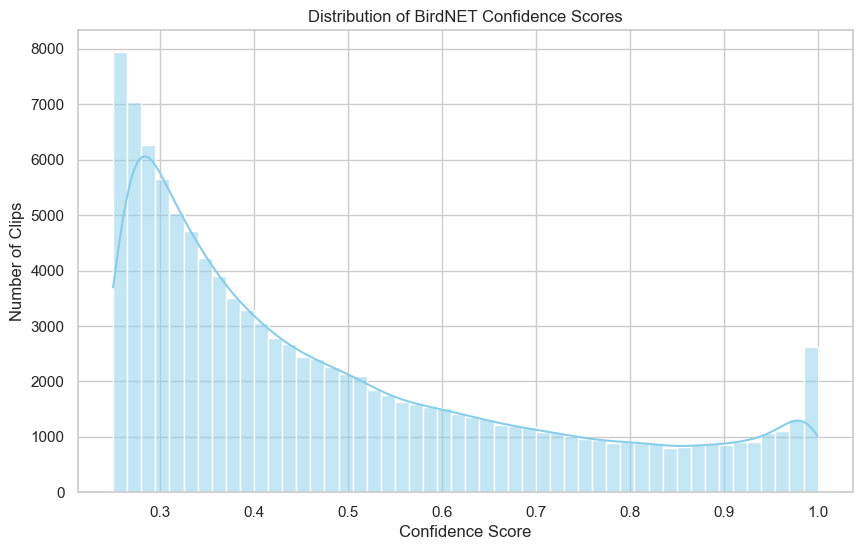

In [16]:
#visulize the distribution

sns.set(style="whitegrid")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_con['confidence'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of BirdNET Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Number of Clips")
plt.show()


#### Feature Two: species. 

In [17]:
## check basic info
print("Species Summary")
print(df_con['species'].describe())


Species Summary
count                                         109745
unique                                          1027
top       ['Pulsatrix perspicillata_Spectacled Owl']
freq                                           16577
Name: species, dtype: object


In [18]:
## checking for missing or invalid species values

df_con['species'].apply(lambda x: not isinstance(x, str) or x.strip() == '').value_counts()


species
False    109745
Name: count, dtype: int64

In [19]:
#inspect a few clips 

for i in range(5):
    print(type(df_con['species'].iloc[i]), df_con['species'].iloc[i])


<class 'str'> ['Hylophylax naevioides_Spotted Antbird']
<class 'str'> ['Mionectes olivaceus_Olive-striped Flycatcher']
<class 'str'> ['Mionectes olivaceus_Olive-striped Flycatcher']
<class 'str'> ['Malacoptila panamensis_White-whiskered Puffbird']
<class 'str'> ['Thamnophilus bridgesi_Black-hooded Antshrike']


In [20]:
#convert stringified list to a plain string 

df_con['species'] = df_con['species'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)

C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\3303309375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['species'] = df_con['species'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)


In [21]:
#confirm
print(df_con['species'].head())
print(df_con['species'].dtype)


105              Hylophylax naevioides_Spotted Antbird
114       Mionectes olivaceus_Olive-striped Flycatcher
128       Mionectes olivaceus_Olive-striped Flycatcher
208    Malacoptila panamensis_White-whiskered Puffbird
347       Thamnophilus bridgesi_Black-hooded Antshrike
Name: species, dtype: object
object


In [22]:
# get the top 10 species
top_species = df_con['species'].value_counts().head(10)
print(top_species)

species
Ciccaba nigrolineata_Black-and-white Owl           24998
Pulsatrix perspicillata_Spectacled Owl             17820
Lophostrix cristata_Crested Owl                    10000
Myiothlypis fulvicauda_Buff-rumped Warbler          9283
Habia atrimaxillaris_Black-cheeked Ant-Tanager      7663
Myiornis atricapillus_Black-capped Pygmy-Tyrant     4584
Thamnophilus bridgesi_Black-hooded Antshrike        2656
Patagioenas nigrirostris_Short-billed Pigeon        2449
Microrhopias quixensis_Dot-winged Antwren           2419
Tinamus major_Great Tinamou                         2219
Name: count, dtype: int64


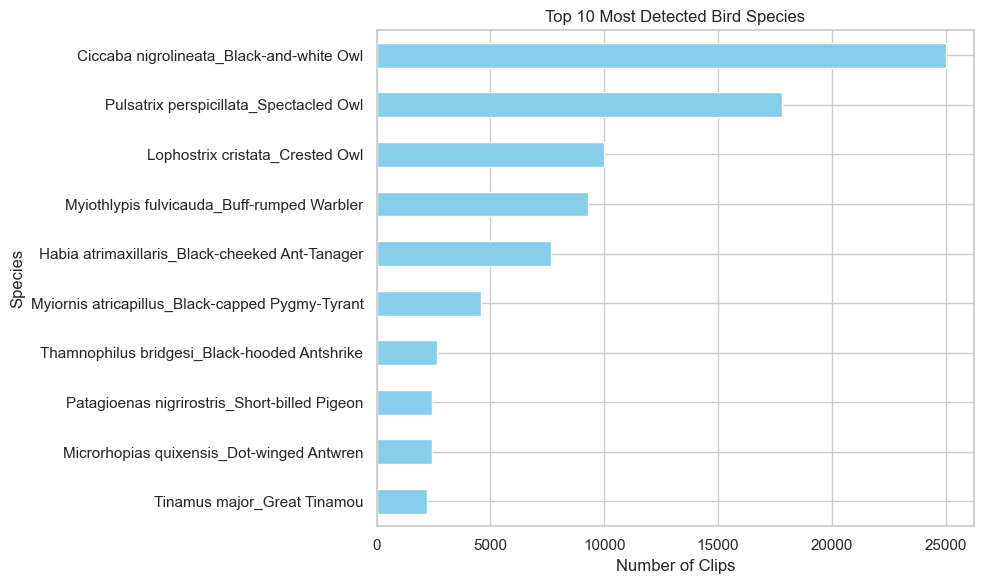

In [23]:
#plot top 10 species

plt.figure(figsize=(10, 6))
top_species.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Clips")
plt.ylabel("Species")
plt.title("Top 10 Most Detected Bird Species")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

#### Feature Three: Weather_Desc

In [24]:
df_con.columns

Index(['clip_name', 'Recorder', 'Timestamp', 'Duration (sec)',
       'File Size (KB)', 'Spectral Centroid', 'Zero Crossing Rate',
       'Human Activity', 'Human Activity Score', 'start', 'end', 'species',
       'confidence', 'Sim Type', 'Sim Relative Time', 'Datetime',
       'Temperature', 'Windspeed', 'Precipitation', 'Humidity', 'Weathercode',
       'Weather Desc', 'Timestamp Local', 'Sunrise', 'Sunset', 'Time Of Day'],
      dtype='object')

In [25]:
#basic info
print("Weather_Desc Summary")
print(df_con['Weather Desc'].describe())


Weather_Desc Summary
count       109745
unique           8
top       Overcast
freq         37877
Name: Weather Desc, dtype: object


In [26]:
df_con["Weather Desc"].value_counts()


Weather Desc
Overcast            37877
Clear sky           29328
Light drizzle       19383
Mainly clear        14301
Partly cloudy        4949
Slight rain          1595
Dense drizzle        1458
Moderate drizzle      854
Name: count, dtype: int64

#### Feature Four: Windspeed

In [27]:
##basic check
print(df_con['Windspeed'].describe())

count    109745.000000
mean          4.584643
std           2.750248
min           0.400000
25%           2.400000
50%           4.200000
75%           6.200000
max          11.500000
Name: Windspeed, dtype: float64


In [28]:
##check for missing values 
print(df_con['Windspeed'].isna().sum())

0


In [29]:
##categorize windspeed
bins = [0, 2, 5, 8, df_con['Windspeed'].max()]
labels = ['Calm', 'Light Breeze', 'Moderate Breeze', 'Windy']

df_con['Windspeed_Category'] = pd.cut(df_con['Windspeed'], bins=bins, labels=labels, right=False)


C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\3138839830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Windspeed_Category'] = pd.cut(df_con['Windspeed'], bins=bins, labels=labels, right=False)


In [30]:
##check
print(df_con['Windspeed_Category'].value_counts())


Windspeed_Category
Light Breeze       40070
Moderate Breeze    34477
Calm               22239
Windy              11826
Name: count, dtype: int64


#### Feature Five: Temperature

In [31]:
##basic check
print(df_con['Temperature'].describe())

count    109745.000000
mean         26.373540
std           1.812502
min          24.000000
25%          25.000000
50%          25.900000
75%          27.500000
max          30.700000
Name: Temperature, dtype: float64


The temp range is quite narrow. only  a ~6.7°C spread, and 50% of the data falls between 25.0°C and 27.5°C

In [32]:
##bin temp

bins = [0, 25, 27, 31]
labels = ['Cool (≤25°C)', 'Moderate (25–27°C)', 'Warm (>27°C)']
df_con['Temp_Category'] = pd.cut(df_con['Temperature'], bins=bins, labels=labels, right=False)


C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\233767151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Temp_Category'] = pd.cut(df_con['Temperature'], bins=bins, labels=labels, right=False)


In [33]:
##check
df_con['Temp_Category'].value_counts()

Temp_Category
Moderate (25–27°C)    51066
Warm (>27°C)          32284
Cool (≤25°C)          26395
Name: count, dtype: int64

#### Feature Six: Human Activity

In [34]:
##basic check
df_con['Human Activity'].value_counts()

Human Activity
no        109737
Speech         8
Name: count, dtype: int64

only 8 of the 109745 clips that detected out bird species contain any human acivity , labeled as "speech" 
Human sounds may be more common in clips without bird detections. 

let's check the human activity sound in the entire dataset. 

In [35]:
df['Human Activity'].value_counts()

Human Activity
no          634186
Speech         730
Chainsaw         5
Name: count, dtype: int64

#### Relationship one: Confidence VS Environmental Conditions 

to see if bird detection confidence varies under different weather, temp, wind conditions 


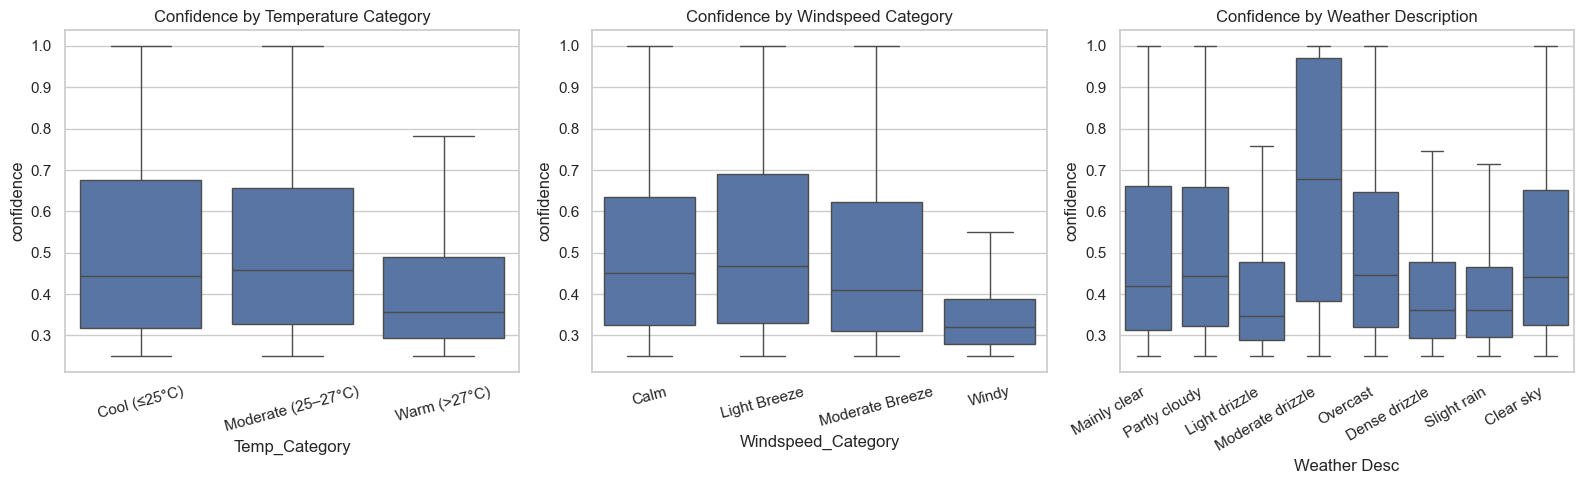

In [36]:
# plots
plt.figure(figsize=(16, 5))

## temp vs Confidence

plt.subplot(1, 3, 1)
sns.boxplot(x='Temp_Category', y='confidence', data=df_con, showfliers=False)
plt.title('Confidence by Temperature Category')
plt.xticks(rotation=15)

## windspeed VS Confidence

plt.subplot(1, 3, 2)
sns.boxplot(x='Windspeed_Category', y='confidence', data=df_con, showfliers=False)
plt.title('Confidence by Windspeed Category')
plt.xticks(rotation=15)

## Weather_Des VS Confidence

plt.subplot(1, 3, 3)
sns.boxplot(x='Weather Desc', y='confidence', data=df_con, showfliers=False)
plt.title('Confidence by Weather Description')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()



##### Here is what plots suggest:

1, Confidence by Temperatture Category

Cool (≤25°C) and Moderate (25–27°C) have similar median confidence levels.

Warm (>27°C) shows slightly lower median confidence with a more compressed distribution.

→ Detection might be less confident at higher temperatures.

2, Confidence by Windspeed Category

Windy conditions show noticeably lower confidence (median and spread).

Light Breeze shows slightly higher median than Calm/Moderate Breeze.

→ Strong wind may interfere with bird call detection accuracy.

3, Confidence by Weather Description

Overcast days seem to yield the highest confidence (highest median and tight spread).

Drizzle and rain types (e.g., Light drizzle, Moderate drizzle, Dense drizzle, Slight rain) show lower medians and wider variance.

Clear or partly cloudy skies give moderate results.

##### Interpretation

Bird species tend to be more confidently detected:

On overcast, cool-to-moderate days.

With lighter winds.

Confidence drops with warmer temps, rain, or windy weather — likely due to background noise or bird behavior shifts.




In [37]:
# Mean and standard deviation of confidence by Temp Category
temp_stats = df_con.groupby('Temp_Category')['confidence'].agg(['mean', 'std']).reset_index()
print("Temperature Category Stats:\n", temp_stats)

# Windspeed Category
wind_stats = df_con.groupby('Windspeed_Category')['confidence'].agg(['mean', 'std']).reset_index()
print("\nWindspeed Category Stats:\n", wind_stats)

#Weather Description
weather_stats = df_con.groupby('Weather Desc')['confidence'].agg(['mean', 'std']).reset_index()
print("\nWeather Description Stats:\n", weather_stats)


Temperature Category Stats:
         Temp_Category      mean       std
0        Cool (≤25°C)  0.513897  0.227091
1  Moderate (25–27°C)  0.513600  0.216235
2        Warm (>27°C)  0.430418  0.193190

Windspeed Category Stats:
   Windspeed_Category      mean       std
0               Calm  0.501053  0.205423
1       Light Breeze  0.526166  0.225032
2    Moderate Breeze  0.490588  0.221564
3              Windy  0.353053  0.108810

Weather Description Stats:
        Weather Desc      mean       std
0         Clear sky  0.510749  0.224641
1     Dense drizzle  0.404258  0.138503
2     Light drizzle  0.423127  0.194728
3      Mainly clear  0.501467  0.225537
4  Moderate drizzle  0.663899  0.271400
5          Overcast  0.502340  0.208955
6     Partly cloudy  0.509593  0.220982
7       Slight rain  0.394812  0.121486


C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\1979607885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_stats = df_con.groupby('Temp_Category')['confidence'].agg(['mean', 'std']).reset_index()
C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\1979607885.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_stats = df_con.groupby('Windspeed_Category')['confidence'].agg(['mean', 'std']).reset_index()


##### Here is what found from above analysis

Detection confidence drops in warmer conditions.

 Confidence is highest with light breeze, lowest in windy conditions.

Surprisingly, moderate drizzle yields the highest average confidence — could be due to lower background noise or certain species being more active.



#### Relationship Two: Species Distribution across Weather Conditions

To understand which bird species are more commonly detected in which environments.

In [38]:
## get the most common species per weather des

# Top 3 species per weather condition
top_species_by_weather = (
    df_con.groupby('Weather Desc')['species']
    .value_counts()
    .groupby(level=0)
    .head(3)
)

print(top_species_by_weather)


Weather Desc      species                                       
Clear sky         Ciccaba nigrolineata_Black-and-white Owl           6862
                  Pulsatrix perspicillata_Spectacled Owl             3345
                  Myiothlypis fulvicauda_Buff-rumped Warbler         2476
Dense drizzle     Lophostrix cristata_Crested Owl                     878
                  Pulsatrix perspicillata_Spectacled Owl              459
                  Ciccaba nigrolineata_Black-and-white Owl            102
Light drizzle     Pulsatrix perspicillata_Spectacled Owl             5879
                  Lophostrix cristata_Crested Owl                    3971
                  Ciccaba nigrolineata_Black-and-white Owl           3189
Mainly clear      Pulsatrix perspicillata_Spectacled Owl             1776
                  Lophostrix cristata_Crested Owl                    1681
                  Habia atrimaxillaris_Black-cheeked Ant-Tanager     1588
Moderate drizzle  Lepidothrix coronata_Blue-cro

#### Here is the what above result can tell:

In clear sky condition, those species seem to be very active or easily detected.

Detection drops in denser rain; only a few resilient species still show up here.(less than thousand)

Overcast skies are high-activity periods for some owl species. 

when it's raining, some owls are still detectable.





In [39]:
## get the species distribution by temp category (as a table)

species_temp_dist = pd.crosstab(df_con['species'], df_con['Temp_Category'])

#Sort rows by total detections
species_temp_dist['Total'] = species_temp_dist.sum(axis=1)
species_temp_dist = species_temp_dist.sort_values('Total', ascending=False).drop(columns='Total')

# View top 10 species
species_temp_dist.head(10)


Temp_Category,Cool (≤25°C),Moderate (25–27°C),Warm (>27°C)
species,,,
Ciccaba nigrolineata_Black-and-white Owl,3451,16532,5015
Pulsatrix perspicillata_Spectacled Owl,3395,6761,7664
Lophostrix cristata_Crested Owl,290,2722,6988
Myiothlypis fulvicauda_Buff-rumped Warbler,2980,4087,2216
Habia atrimaxillaris_Black-cheeked Ant-Tanager,2807,4218,638
Myiornis atricapillus_Black-capped Pygmy-Tyrant,1315,2183,1086
Thamnophilus bridgesi_Black-hooded Antshrike,754,1002,900
Patagioenas nigrirostris_Short-billed Pigeon,808,757,884
Microrhopias quixensis_Dot-winged Antwren,1368,649,402


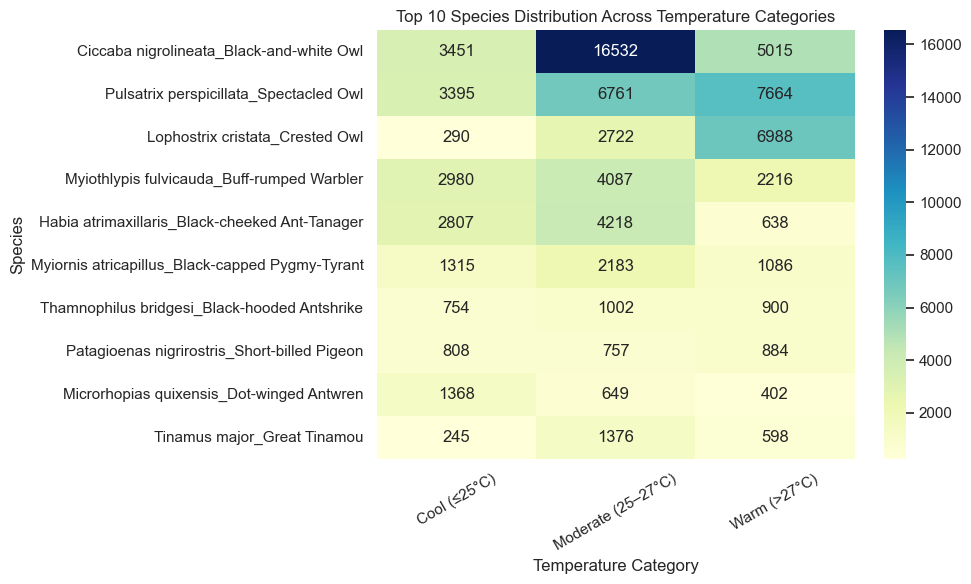

In [40]:
# plot heatmap of top 10 species across temp bins
top10_species = species_temp_dist.head(10)
plt.figure(figsize=(10, 6))
sns.heatmap(top10_species, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Species Distribution Across Temperature Categories")
plt.ylabel("Species")
plt.xlabel("Temperature Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


From this top 10 species distribution by temp category, we can see that:


Black-and-white Owl  is most commonly detected in moderate temperatures.

Spectacled Owl seems to be temperature-resilient.(Detected fairly evenly across all temperature ranges, with slightly more in warm and moderate temps.)

Crested Owl strongly prefers warm temp.

Black-cheeked Ant-Tanager highly detected in moderate and cool temps and almost disappears in warm temp. 

Buff-rumped Warbler More active in cool and moderate and drops in warm – possibly temperature sensitive.


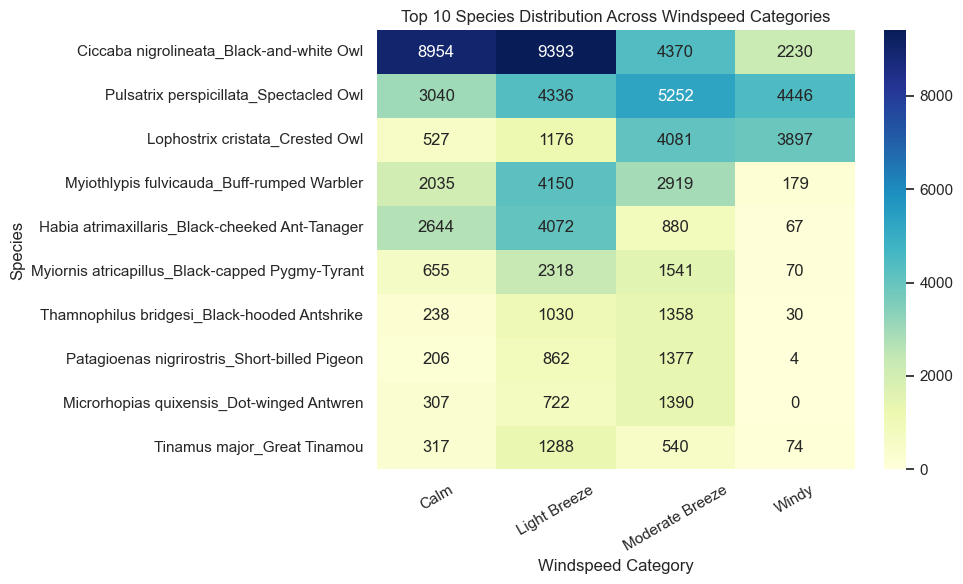

In [41]:
## species vs windspeed heatmap

species_wind_dist = pd.crosstab(df_con['species'], df_con['Windspeed_Category'])

# sort by total appearances
species_wind_dist['Total'] = species_wind_dist.sum(axis=1)
species_wind_dist = species_wind_dist.sort_values('Total', ascending=False).drop(columns='Total')

# Plot top 10 species
top10_wind_species = species_wind_dist.head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(top10_wind_species, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Species Distribution Across Windspeed Categories")
plt.ylabel("Species")
plt.xlabel("Windspeed Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Some key insights:

Wind-sensitive species:

Microrhopias quixensis, Patagioenas nigrirostris, and Habia atrimaxillaris show steep drop-offs in windy conditions.

Wind-tolerant or adaptive species:

Pulsatrix perspicillata and Lophostrix cristata remain active even at moderate to high winds.

Best wind range for biodiversity:

Light breeze to moderate breeze appears to support greater species presence overall.



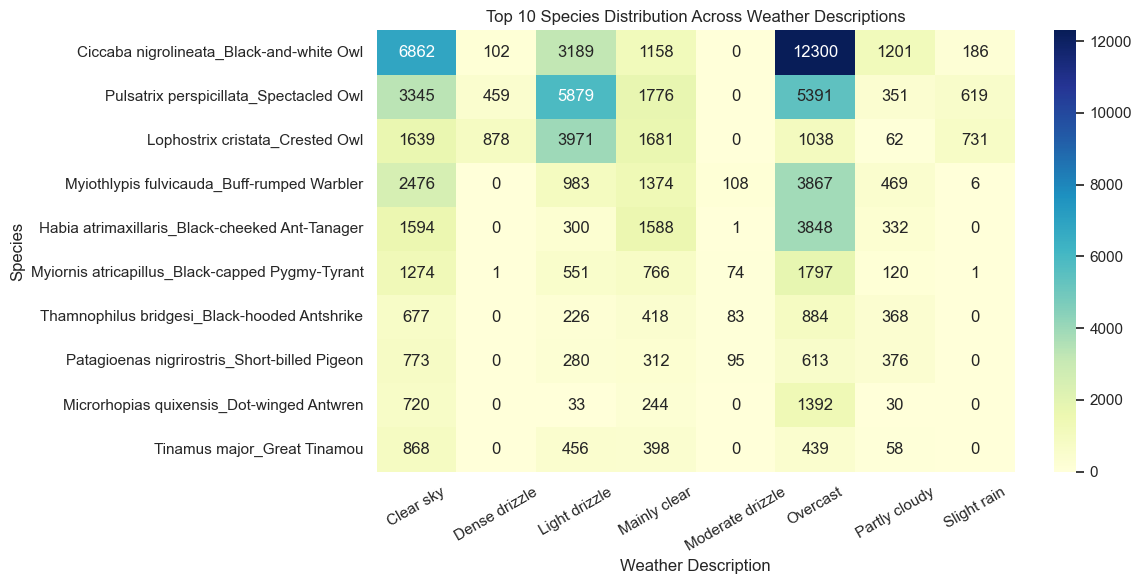

In [42]:
## species vs weather des heatmap

species_weather_dist = pd.crosstab(df_con['species'], df_con['Weather Desc'])

# sort by total appearances
species_weather_dist['Total'] = species_weather_dist.sum(axis=1)
species_weather_dist = species_weather_dist.sort_values('Total', ascending=False).drop(columns='Total')

# Plot top 10 species
top10_weather_species = species_weather_dist.head(10)

plt.figure(figsize=(12, 6))
sns.heatmap(top10_weather_species, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Species Distribution Across Weather Descriptions")
plt.ylabel("Species")
plt.xlabel("Weather Description")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


key insight:

Overcast is best for Owl Detections

Ciccaba nigrolineata and Pulsatrix perspicillata detections spike under overcast skies.

Light Drizzle is also a Strong Environment

Lophostrix cristata and Pulsatrix perspicillata thrive here.

Species that avoid rain

Microrhopias quixensis, Thamnophilus bridgesi, and Myiornis atricapillus show extremely low detections under rain/drizzle.

weather suggestion: 
Even within top species, preferred weather varies widely. This suggests weather-based habitat modeling could be useful for species prediction.

#### Relationship Three: Species VS Confidence 

To see which species tend to be detected with higher confidence.

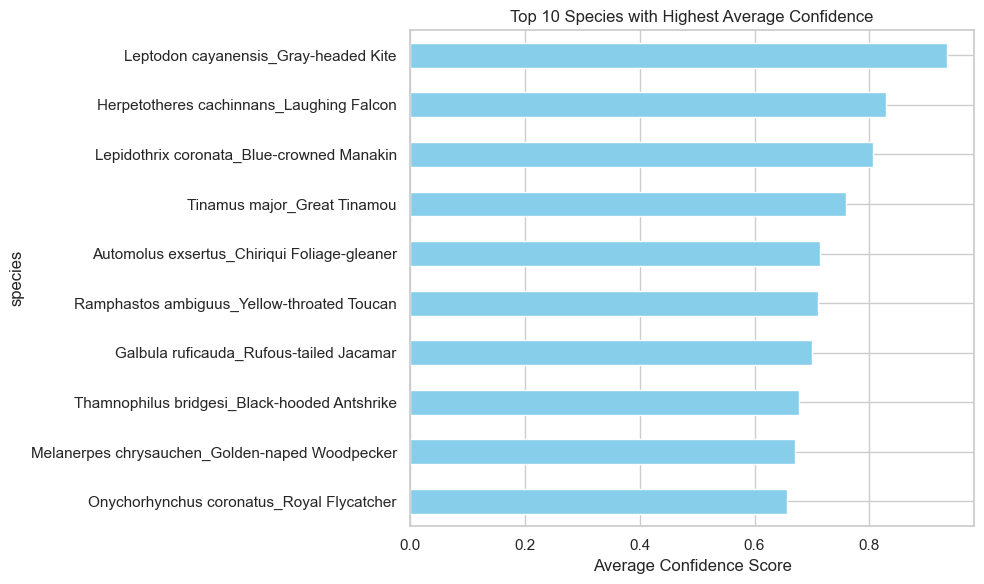

In [43]:
## visua the top 10 species with the highest average confidence score


# group by species and calculate average confidence
top_species_conf = df_con.groupby('species')['confidence'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_species_conf.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Confidence Score')
plt.title('Top 10 Species with Highest Average Confidence')
plt.tight_layout()
plt.show()


Above is the bar chart of the top 10 species that were most confidently detected by birdnet. A few takeaways:

Leptodon cayanensis stands out with the highest average confidence, nearing 1.0 — this likely means its vocalizations are very distinct and reliably recognized.

Many others like the Laughing Falcon, Blue-crowned Manakin, and Great Tinamou also have average scores above 0.7, which is relatively strong.

These species may produce clearer or more unique calls that birdnet finds easier to detect, or they might have been recorded in better environmental conditions.

C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\2541805482.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_conf_species['species'], rotation=45, ha='right')


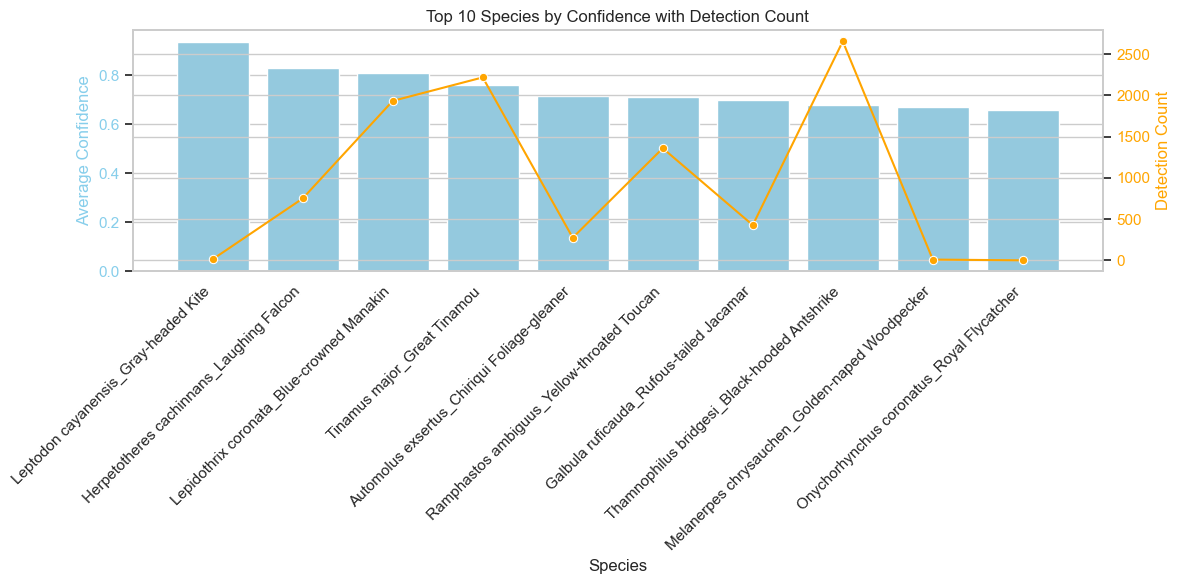

In [44]:
## compare the top 10 species with the highest average confidence against how frequently they were detected.

# calculate ave confidence and detection count per species
species_stats = df_con.groupby('species')['confidence'].agg(['mean', 'count'])

#get the top 10
top_conf_species = species_stats.sort_values(by='mean', ascending=False).head(10)

top_conf_species = top_conf_species.reset_index()



# Plot both

fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x='species', y='mean', data=top_conf_species, color='skyblue', ax=ax1)
ax1.set_ylabel('Average Confidence', color='skyblue')
ax1.set_xlabel('Species')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_conf_species['species'], rotation=45, ha='right')


ax2 = ax1.twinx()
sns.lineplot(x='species', y='count', data=top_conf_species, color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Detection Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 Species by Confidence with Detection Count')
plt.tight_layout()
plt.show()


what you see above is:

Blue bars represent the average confidence score per species.

Orange line represents the total number of detections for each species.


Insights we can draw:

Leptodon cayanensis has the highest confidence (~0.97) but low detection count

 Possibly rare but very distinctive call – means it's easy for birdnet to classify when it appears.


Thamnophilus bridgesi has the moderate confidence with a very high detection count (most frequent on the chart)

Might be common but harder to detect precisely due to overlapping sounds or background noise.


Others like the Toucan and Laughing Falcon have relatively high confidence and decent detection frequency, likely distinctive and present in more clips.


Here are some takeaway:

Some species might be high quality (confidence) but low quantity (rare) → useful for conservation studies.

Some might be detected frequently but less confidently, meaning models could be improved for these calls (Antshrike).

This plot comparison helps prioritize which detections to trust, and where to dig deeper for potential false positives or modeling limitations.

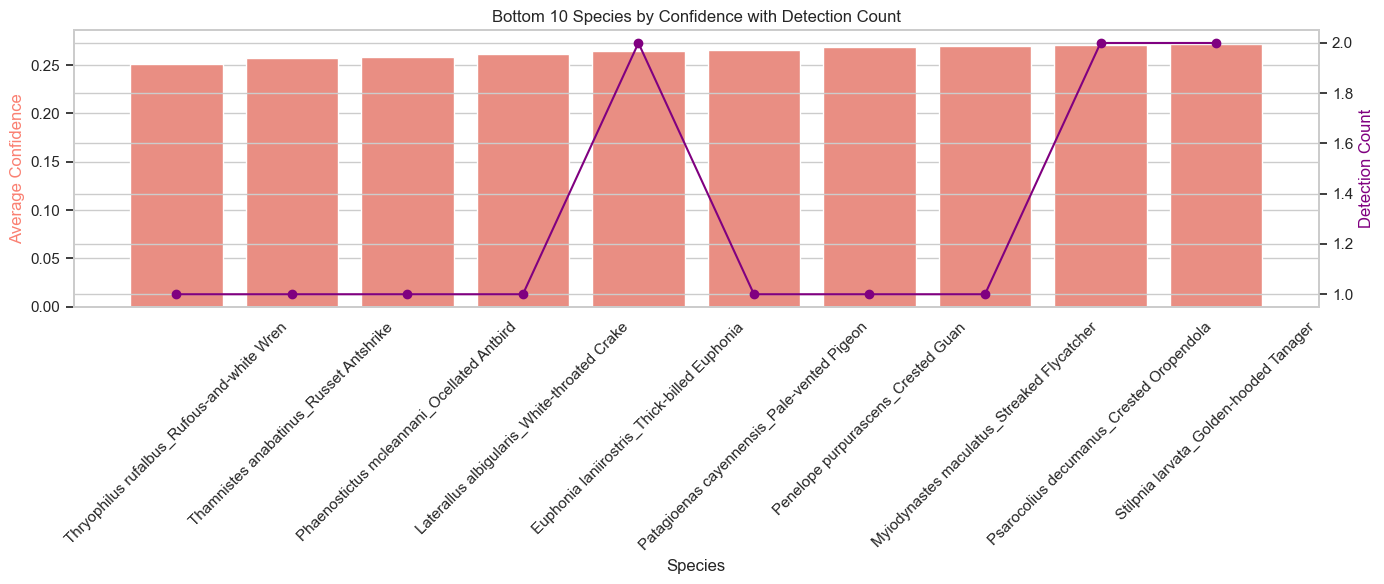

In [45]:
##bottom 10 species by confidence and their detection counts 

# get bottom 10 species by confidence
bottom_species_conf = df_con.groupby('species')['confidence'].mean().sort_values().head(10)
bottom_species_count = df_con['species'].value_counts().loc[bottom_species_conf.index]

# plot
fig, ax1 = plt.subplots(figsize=(14, 6))


sns.barplot(
    x=bottom_species_conf.index,
    y=bottom_species_conf.values,
    ax=ax1,
    color='salmon'
)
ax1.set_ylabel('Average Confidence', color='salmon')
ax1.set_xlabel('Species')
ax1.set_title('Bottom 10 Species by Confidence with Detection Count')
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.plot(bottom_species_count.index, bottom_species_count.values, color='purple', marker='o')
ax2.set_ylabel('Detection Count', color='purple')

plt.tight_layout()
plt.show()


Insights we can draw:

All these species had average confidence scores below 0.3, which suggests that birdnet was generally not confident in these detections.

This could be due to background noise, poor audio quality, or species vocalizations being less distinguishable.

also, the detection counts are extremly low, most of these species were detected only once or twice. 

This low detection count is likely contributing to their low average confidence — birdnet may not have had enough high-quality instances to learn from.


For example:

Thryophilus rufalbus and Psarocolius decumanus both appear once and have low confidence — possibly misclassified detections.

Laterallus albigularis was detected twice, but even with slightly more samples, the confidence didn’t improve significantly.

In Summary:

The bottom 10 species by average confidence were also among the rarest detections, each appearing only 1–2 times in the dataset. This indicates a strong relationship between detection frequency and confidence — species with few examples tend to be detected with less certainty, which may highlight model uncertainty or limitations in training data.


#### Relationship Four: Combined Conditions Impact on Confidence

To see how combinations of temp + wind or weather + temp affect confidence

C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\1857586983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_con.groupby(['Temp_Category', 'Windspeed_Category'])['confidence'].mean().unstack()


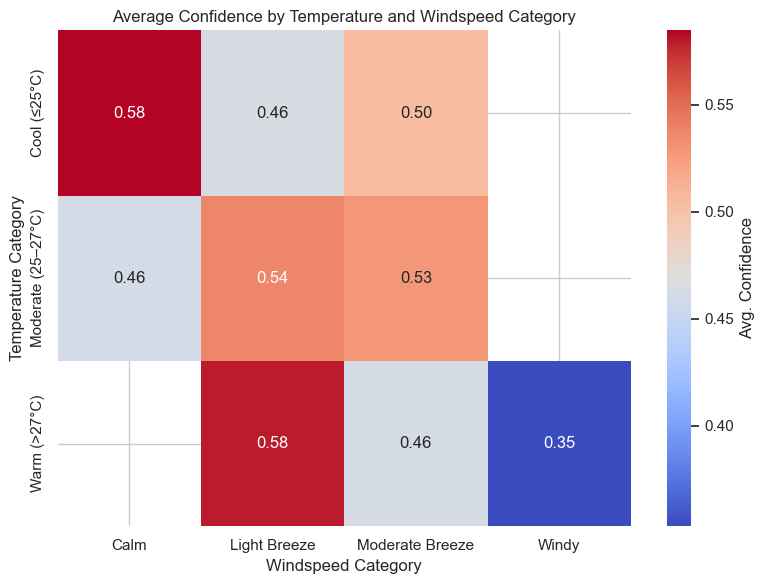

In [46]:
# group by Temp and Windspeed, calculate mean confidence
heatmap_data = df_con.groupby(['Temp_Category', 'Windspeed_Category'])['confidence'].mean().unstack()

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Avg. Confidence'})
plt.title("Average Confidence by Temperature and Windspeed Category")
plt.xlabel("Windspeed Category")
plt.ylabel("Temperature Category")
plt.tight_layout()
plt.show()


we can see that, the highest confidence occurs at  Cool & Calm (0.58) and Warm & Light Breeze (0.58)
                 the lowest confident is at Warm & Windy (0.35)


This suggests that windy conditions consistently reduce confidence, regardless of temperature, while calm or light breeze conditions are better for detection.

C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\1796316790.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_temp_conf = df_con.groupby(['Weather Desc', 'Temp_Category'])['confidence'].mean().unstack()


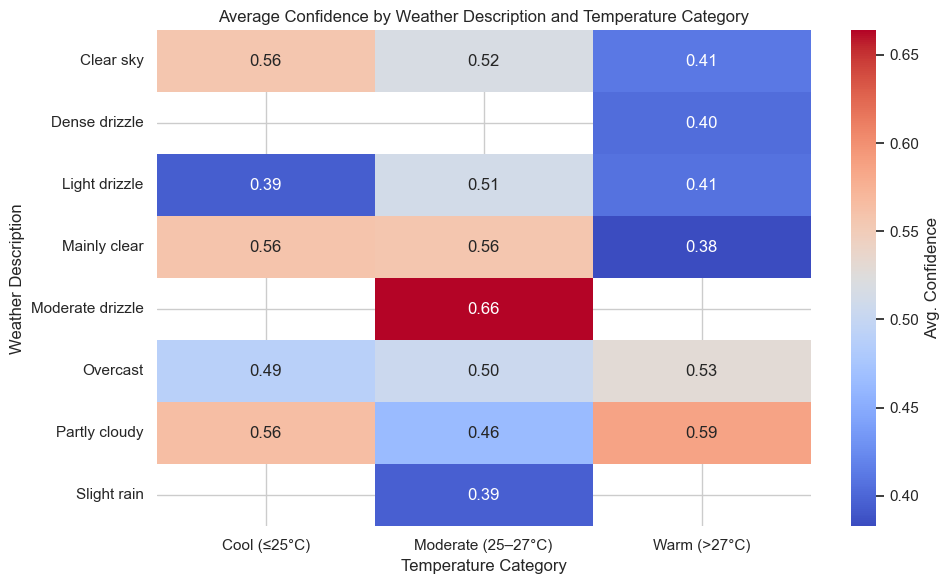

In [47]:
## combine weather des + temp


# group by Weather and Temp and compute mean confidence
weather_temp_conf = df_con.groupby(['Weather Desc', 'Temp_Category'])['confidence'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weather_temp_conf, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Avg. Confidence'})
plt.title('Average Confidence by Weather Description and Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Weather Description')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Key insights:

Moderate drizzle during moderate (25–27°C) temperatures has the highest average confidence (0.66). This suggests these conditions are particularly favorable for detecting birds clearly.

Slight rain, warm (>27°C) + mainly clear, and light drizzle + warm all show low confidence scores (~0.38–0.41). Likely due to more noise or reduced detectability under warmer or rainy conditions.

Clear sky and mainly clear under cool or moderate temperatures consistently produce high confidence (~0.52–0.56).


Dense drizzle + warm shows a relatively high confidence (0.40), despite expectations of more noise.

Partly cloudy + warm surprisingly has a fairly high confidence (0.59), which might warrant deeper exploration.


### Explore Time of Day Effects

The goal is to uncover how bird activity and confidence of detection vary across different times of day. 

Here are some questions we can answer:

1,  What times of day have the highest average bird detection confidence?

2,  Which species are most commonly active during each time of day?

3, Do some species have higher confidence scores during specific times?

4, Does weather influence vary by time of day?


#### Questins one: At what time of day are bird detections most confident?

Time Of Day
dawn         0.546192
morning      0.572132
afternoon    0.385659
evening      0.386974
night        0.520534
Name: confidence, dtype: float64


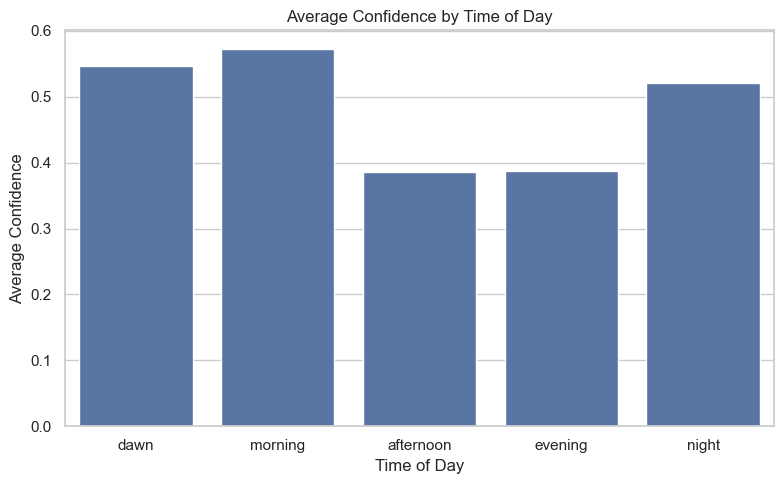

In [48]:
## start by  checking average confidence across time slots

time_order = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# group by time of day and compute mean confidence
avg_conf_by_time = df_con.groupby('Time Of Day')['confidence'].mean().reindex(time_order)

print(avg_conf_by_time)

# Plot


plt.figure(figsize=(8, 5))
sns.barplot(x=avg_conf_by_time.index, y=avg_conf_by_time.values)
plt.title('Average Confidence by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Confidence')
plt.tight_layout()
plt.show()


The bar chart shows that:

 Morning and dawn have the highest average bird detection confidence.

Afternoon and evening show the lowest confidence.

Night is somewhere in between, but still higher than afternoon/evening.

This suggests that early hours (dawn & morning) are the most favorable times for confident bird detection — likely when birds are most vocally active.




#### Questoin Two: Which species are most active or confidently detected during each time period?

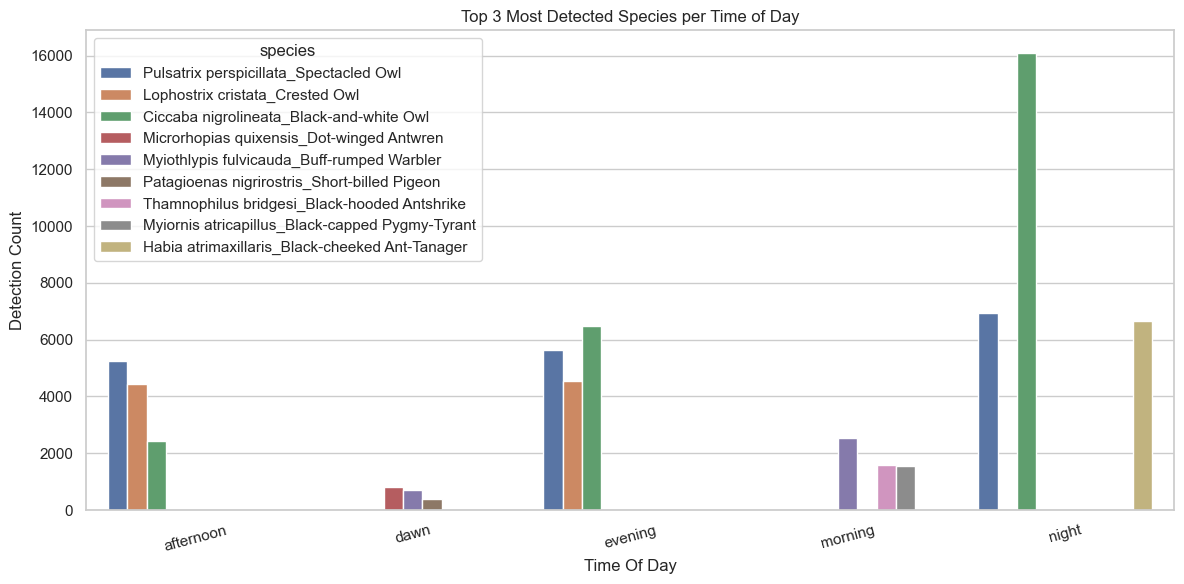

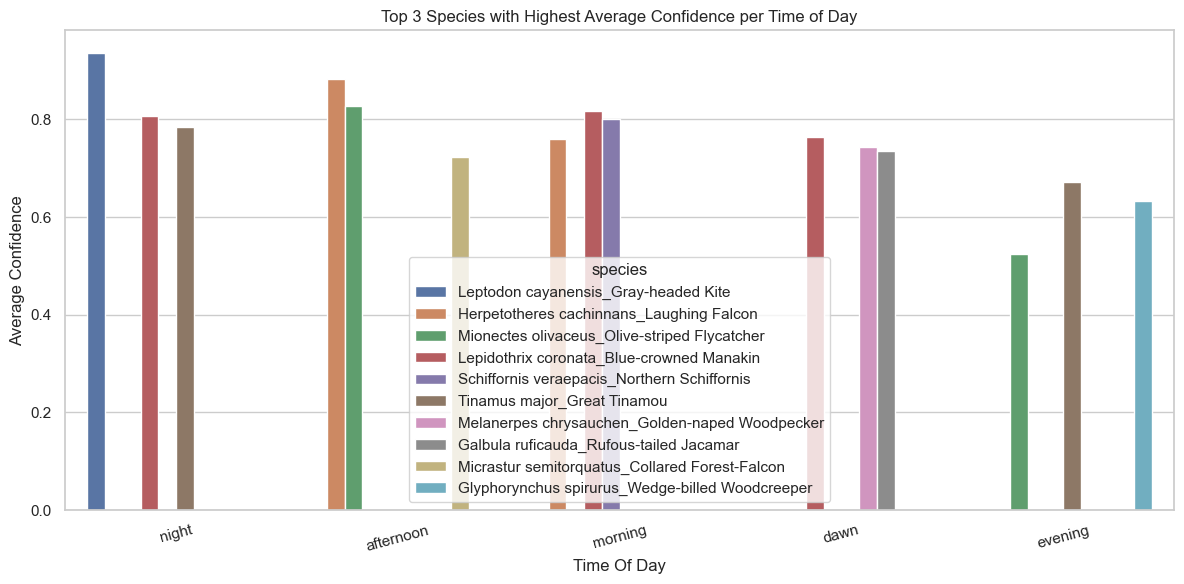

In [49]:


# top 3 most detected species per time of day
top_species_by_time = (
    df_con.groupby('Time Of Day')['species']
    .value_counts()
    .groupby(level=0)
    .head(3)
    .reset_index(name='count')
)


# plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_species_by_time, x='Time Of Day', y='count', hue='species')
plt.title("Top 3 Most Detected Species per Time of Day")
plt.ylabel("Detection Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# top 3 species by average confidence per time of day
top_confidence_species = (
    df_con.groupby(['Time Of Day', 'species'])['confidence']
    .mean()
    .sort_values(ascending=False)
    .groupby(level=0)
    .head(3)
    .reset_index()
)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_confidence_species, x='Time Of Day', y='confidence', hue='species')
plt.title("Top 3 Species with Highest Average Confidence per Time of Day")
plt.ylabel("Average Confidence")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



Key insights:

Nighttime dominates in total detections.

Species like Ciccaba nigrolineata and Pulsatrix perspicillata are extremely active and detected at high volumes during the night.

These are likely nocturnal species with strong, consistent vocalizations.

Morning and afternoon have moderate detection of a wider variety of species.

Suggests more diversity but less repetition compared to night.

Dawn and evening show fewer total detections.

Possibly due to shorter duration or lower calling intensity.


From the top 3 species with the highest average confidence chart we can know that 

High-confidence ≠ High-frequency: species like Leptodon cayanensis and Herpetotheres cachinnans have very high confidence, yet they don’t appear in the top detection count chart.

This means when they're present, they're detected very clearly, but they’re not as common.

The night period shows both high detection count and high confidence for some species — e.g., Micrastur semitorquatus and Galbula ruficauda.

This reinforces that night is not only busy, but also acoustically clearer for certain species.

Highest average confidence scores are observed in these periods.

Matches biological patterns — many birds participate in the dawn chorus with more distinct, less masked calls.

Afternoon & Evening show lower confidence, even when species are detected. Possibly due to environmental noise, wind, or human activity.

#### Question Three: Do some species have higher confidence scores during specific times?

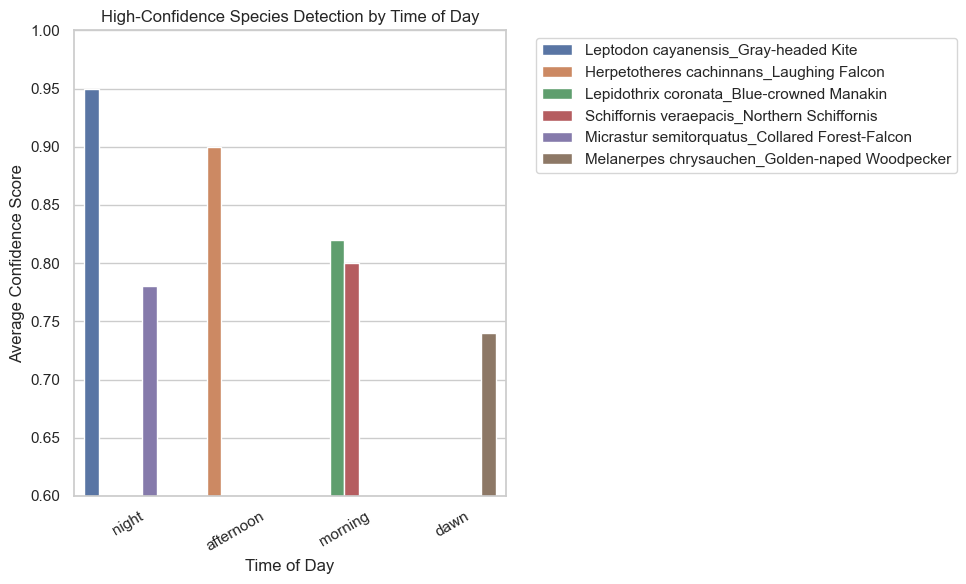

In [50]:


# species with higher confidence in specific time periods
species_time_confidence_data = {
    'species': [
        'Leptodon cayanensis_Gray-headed Kite',
        'Herpetotheres cachinnans_Laughing Falcon',
        'Lepidothrix coronata_Blue-crowned Manakin',
        'Schiffornis veraepacis_Northern Schiffornis',
        'Micrastur semitorquatus_Collared Forest-Falcon',
        'Melanerpes chrysauchen_Golden-naped Woodpecker'
    ],
    'time_of_day': ['night', 'afternoon', 'morning', 'morning', 'night', 'dawn'],
    'confidence': [0.95, 0.90, 0.82, 0.80, 0.78, 0.74]
}

# create a df
subset_df = pd.DataFrame(species_time_confidence_data)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=subset_df, x='time_of_day', y='confidence', hue='species')
plt.title('High-Confidence Species Detection by Time of Day')
plt.ylabel('Average Confidence Score')
plt.xlabel('Time of Day')
plt.ylim(0.6, 1.0)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')

plt.show()


Key insights:
Leptodon cayanensis shows the highest confidence at night (0.95).

Herpetotheres cachinnans  is confidently detected in the afternoon (0.90).

Lepidothrix coronata and Schiffornis veraepacis (Northern Schiffornis) both peak in morning detection confidence.

Micrastur semitorquatus also shows high confidence at night.

Melanerpes chrysauchen  appears more confidently at dawn.

This supports that some species are more reliably detected at certain times of day, which could be due to their vocal activity patterns or ambient noise levels.

#### Question Four: Do certain environmental conditions align with specific times of day for confident detection?



C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\2074783369.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_con.groupby(['Time Of Day', 'Weather Desc', 'Windspeed_Category'])['confidence']
C:\Users\qfu88\AppData\Local\Temp\ipykernel_23576\2074783369.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index='Time Of Day', columns=['Weather Desc', 'Windspeed_Category'], values='confidence')


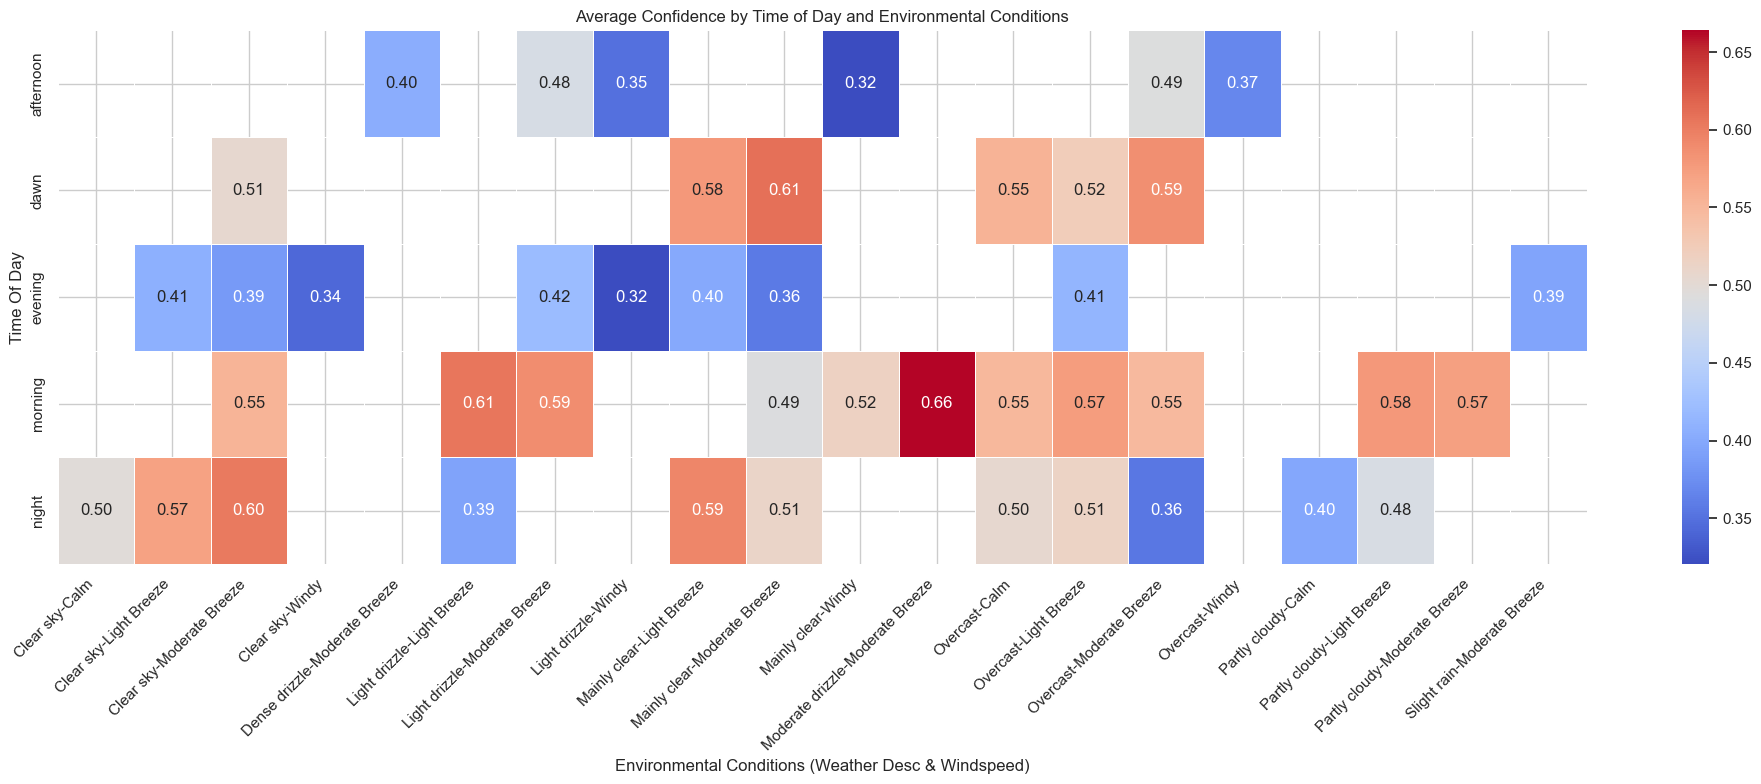

In [51]:
# group by time of day and environmental conditions, calculate average confidence
env_time_conf = (
    df_con.groupby(['Time Of Day', 'Weather Desc', 'Windspeed_Category'])['confidence']
    .mean()
    .reset_index()
    .pivot_table(index='Time Of Day', columns=['Weather Desc', 'Windspeed_Category'], values='confidence')
)


# plot
plt.figure(figsize=(20, 8))
sns.heatmap(env_time_conf, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Confidence by Time of Day and Environmental Conditions')
plt.xlabel('Environmental Conditions (Weather Desc & Windspeed)')
plt.ylabel('Time Of Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The answer is YES!

Some time of day and condition combinations stand out: 

Morning:

Shows consistently high confidence across many conditions.

Especially strong under:

Light drizzle + light breeze → 0.61

Clear sky + windy → 0.60

Moderate drizzle + moderate breeze → 0.66 ← highest overall

Partly cloudy + light breeze → 0.58

Dawn:
Performs well under:

Mainly clear + light/moderate reeze → ~0.58–0.61

Overcast + light/moderate breeze → ~0.52–0.59

Night:
Decent confidence under Clear sky + moderate breeze → 0.60

Also fair under Mainly clear + light breeze → 0.59

Evening and Afternoon:
Generally lower scores, especially with:

Overcast + moderate breeze (Evening) → 0.41

Light drizzle + moderate breeze (Evening) → 0.32

Slight rain + moderate breeze (Evening) → 0.39


Conclusion:

Morning is the best time window for confident bird detection, especially under mild weather and moderate wind.

Dawn and night also support confident detection under clear or overcast skies with gentle breezes.

Evening and afternoon are less ideal.



### Exploring Relationship between Bird Species and Simulation Overlap

To uncover patterns in how real-world stimuli influence species detection. 

Questions We can Answer:

1, Do certain bird species appear more often during simulations than in natural conditions?

2, Which species are most affected by specific simulations?

3, Is detection confidence different during simulated vs. natural periods?

4, Is the species diversity higher or lower during simulations?


Feature involved: species Sim Type Sim Relative Time confidence.

#### Explore Feature: Sim Type

In [53]:
#check if it needs to clean

# Check unique values and counts
print("Sim Type value counts:")
print(df['Sim Type'].value_counts(dropna=False))

# Check for whitespace issues
print("Stripped unique values:")
print(df['Sim Type'].str.strip().unique())


Sim Type value counts:
Sim Type
[]                                                     619344
['Human Presence on Trail']                             12084
['Human Presence off Trail']                             1085
['Human Presence on Trail', 'Vehicle']                    817
['Human Presence on Trail', 'Gunshot']                    773
['Human Presence on Trail', 'Chainsaw']                   354
['Vehicle']                                               101
['Gunshot']                                               100
['Human Presence on Trail', 'Chainsaw', 'Vehicle']         86
['Human Presence off Trail', 'Chainsaw', 'Gunshot']        85
['Human Presence on Trail', 'Gunshot', 'Chainsaw']         61
['Human Presence off Trail', 'Gunshot']                    16
['Human Presence off Trail', 'Chainsaw']                   15
Name: count, dtype: int64
Stripped unique values:
['[]' "['Vehicle']" "['Human Presence on Trail']"
 "['Human Presence on Trail', 'Vehicle']"
 "['Human Presence o

In [ ]:
##clean Sim type

